<>:87: SyntaxWarning: invalid escape sequence '\.'
<>:87: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-114474897.py:87: SyntaxWarning: invalid escape sequence '\.'
  full['Title'] = full['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Saving titanic.zip to titanic (2).zip
Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


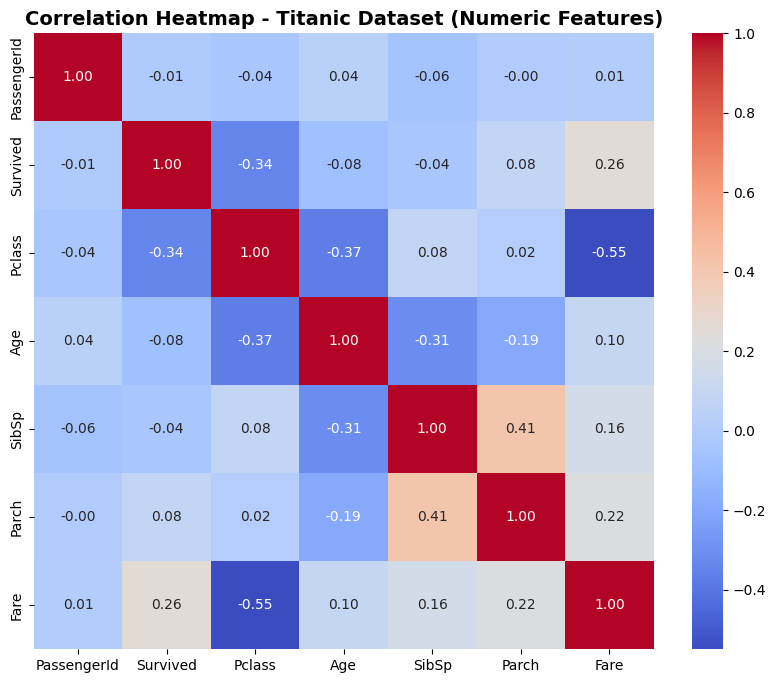

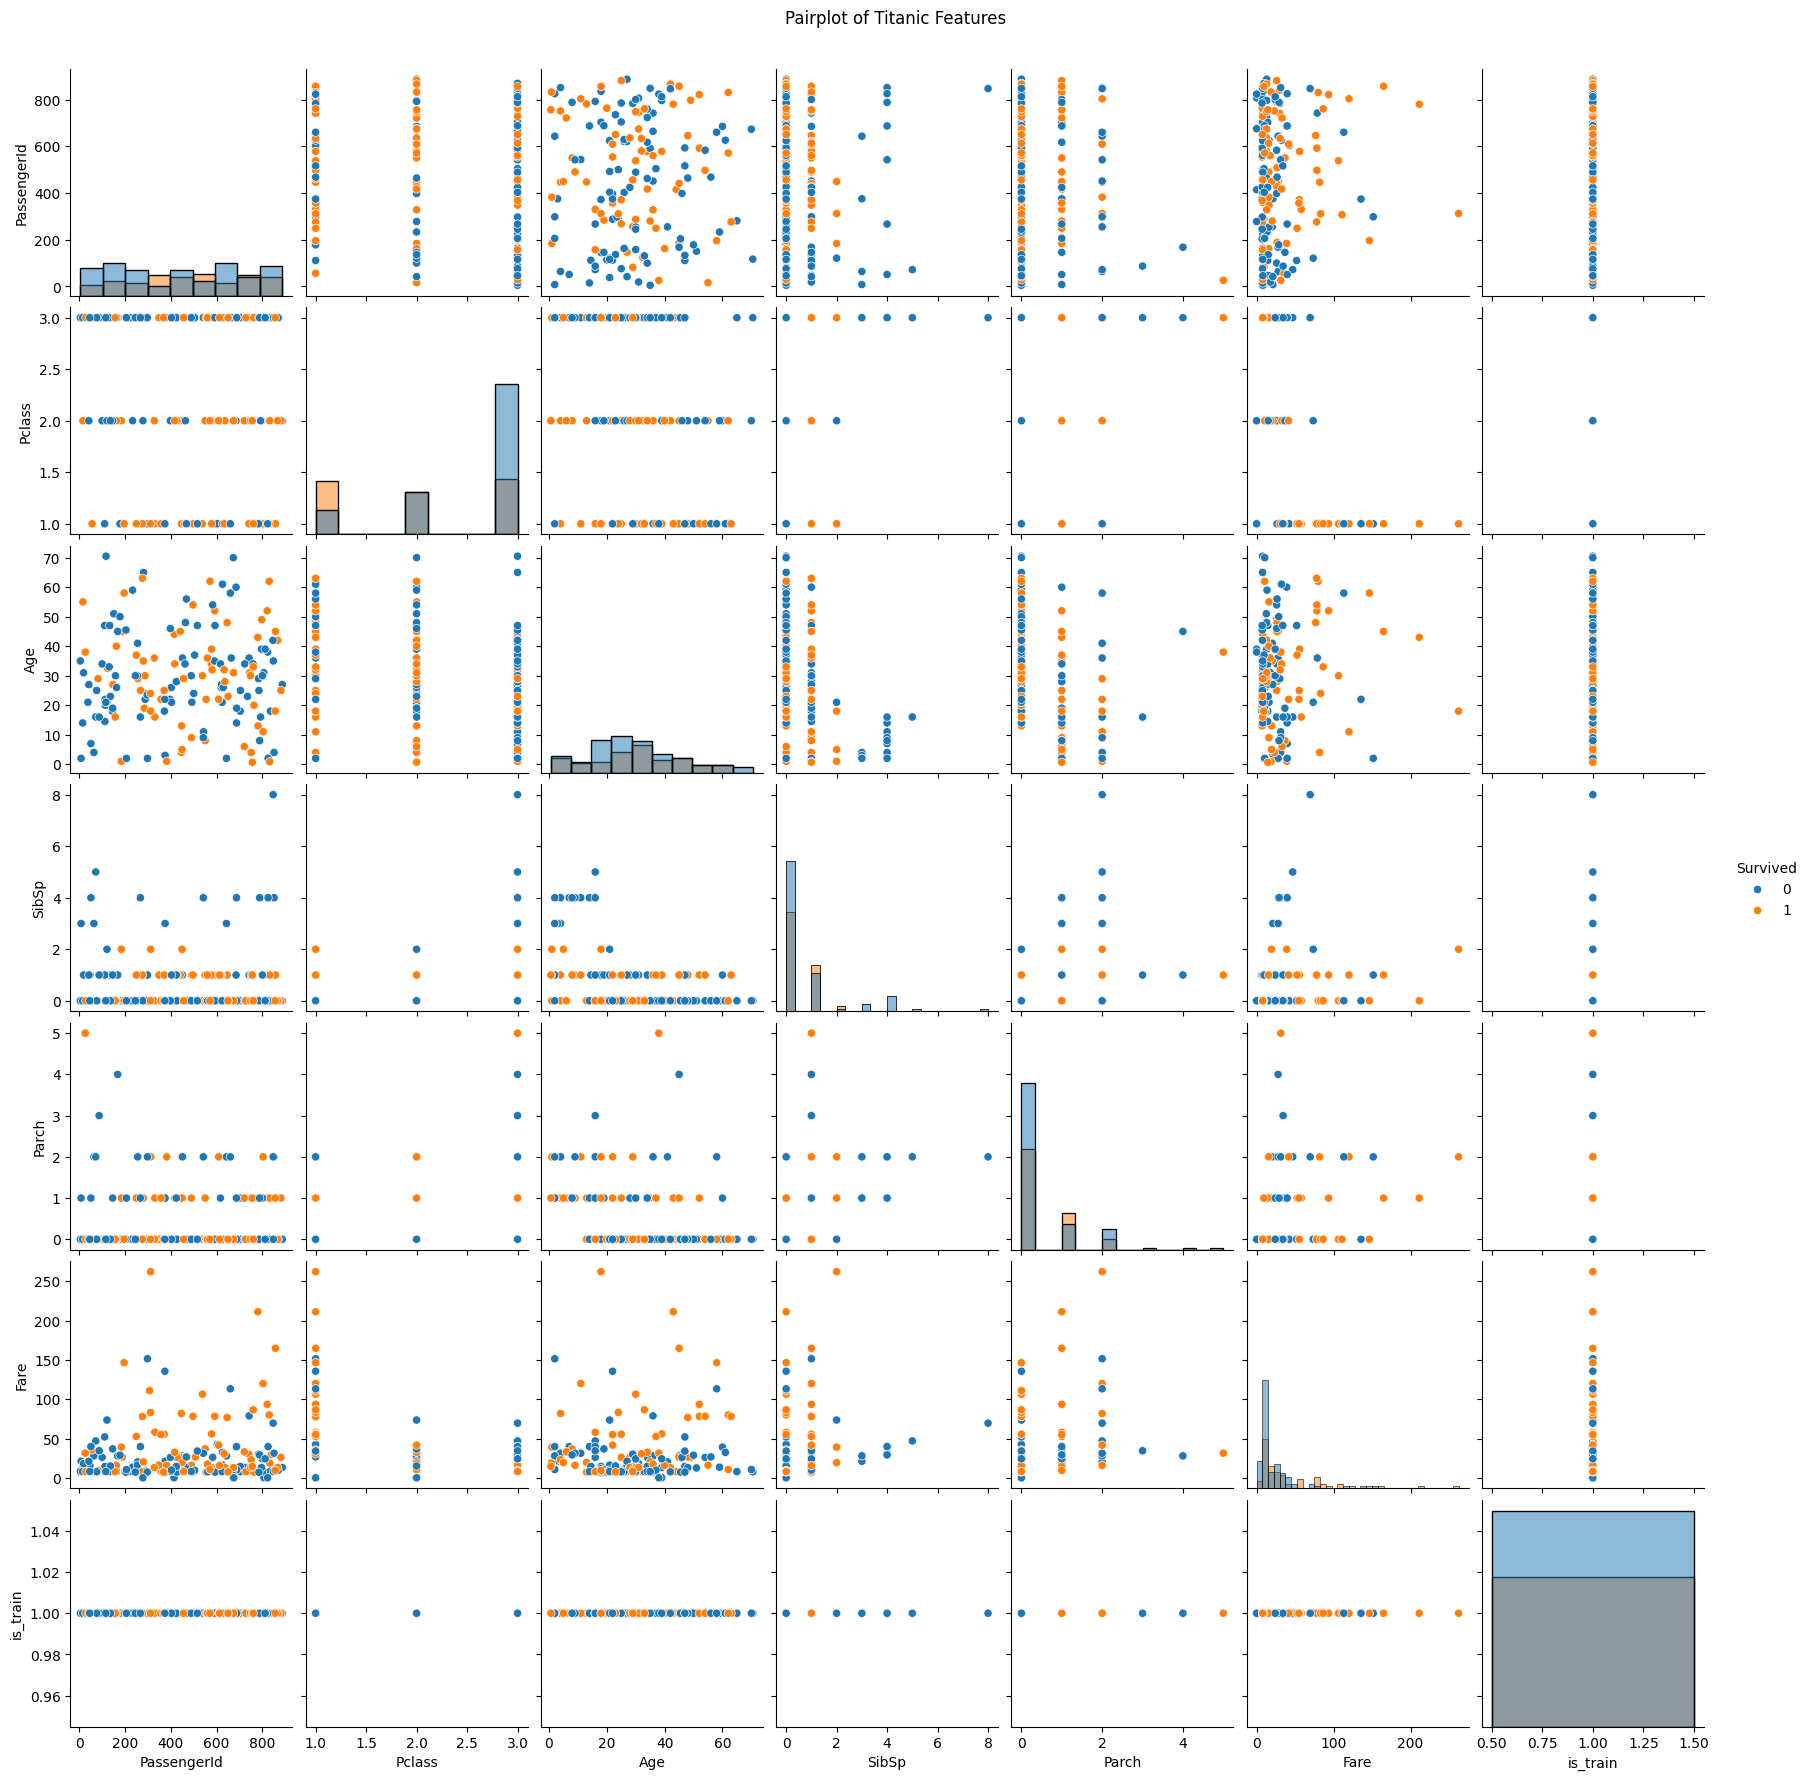

Processed train shape: (891, 30)
Processed test shape: (418, 30)
Baseline CVs (no heavy tuning yet):
CV mean: 0.81813 (+/- 0.03309)
CV mean: 0.83046 (+/- 0.03589)
CV mean: 0.82150 (+/- 0.03407)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
RF best: 0.83832709113608 {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 8, 'bootstrap': True}
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:19:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:19:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:19:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:19:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:19:53] WARNING: /w

XGB best: 0.8439200998751561 {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.8}
LR best: 0.830461922596754 {'C': 1}
Tuned model CVs:
CV mean: 0.83833 (+/- 0.03044)
CV mean: 0.84392 (+/- 0.03692)
CV mean: 0.83046 (+/- 0.03589)


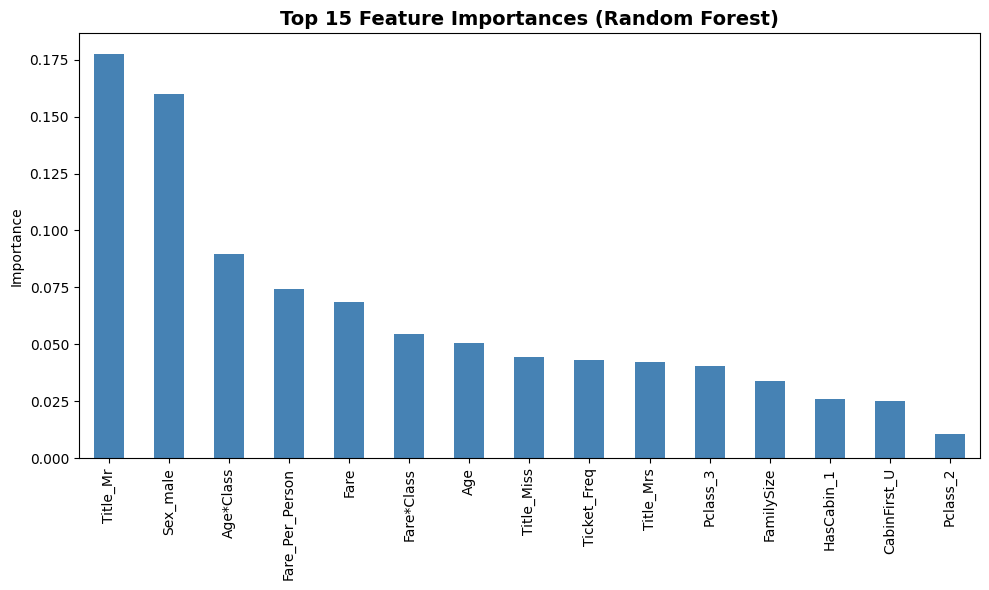

Voting ensemble CV:
CV mean: 0.83831 (+/- 0.03399)
Stacking CV:
CV mean: 0.84169 (+/- 0.02971)
Created titanic_submission_highscore.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [3]:
# -------------------------------
# TITANIC: HIGH-SCORE (80%+) PIPELINE
# Single Colab-ready script
# -------------------------------

# -------------------------------
# Step 0: Install required libraries
# -------------------------------
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm optuna

# -------------------------------
# Step 1: Upload Titanic zip (or individual CSVs)
# -------------------------------
from google.colab import files, drive
import io, zipfile
uploaded = files.upload()  # upload the titanic zip file or individual CSVs

# If user uploaded a zip, extract it automatically
import os
uploaded_files = list(uploaded.keys())
for fn in uploaded_files:
    if fn.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as z:
            z.extractall('titanic_data')
# If CSVs uploaded directly, save them to titanic_data
os.makedirs('titanic_data', exist_ok=True)
for fn in uploaded_files:
    if fn.endswith('.csv'):
        # move the uploaded csv into titanic_data folder
        with open(os.path.join('titanic_data', fn), 'wb') as f:
            f.write(uploaded[fn])

# -------------------------------
# Step 2: Load CSV files
# -------------------------------
import pandas as pd
train = pd.read_csv('titanic_data/train.csv')
test  = pd.read_csv('titanic_data/test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)
display(train.head())

import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# (Fixed) Visual 1: Correlation Heatmap
# -------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = train.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap - Titanic Dataset (Numeric Features)", fontsize=14, fontweight='bold')
plt.show()


# -------------------------------
# Step 3: Combine for unified feature engineering
# -------------------------------
train['is_train'] = 1
test['is_train'] = 0
test['Survived'] = -1  # placeholder

full = pd.concat([train, test], sort=False).reset_index(drop=True)
# -------------------------------
# (Optional) Visual 3: Pairplot (small sample for speed)
# -------------------------------
sns.pairplot(train.sample(200), hue='Survived', diag_kind='hist')
plt.suptitle("Pairplot of Titanic Features", y=1.02)
plt.show()

# -------------------------------
# Step 4: Robust Feature Engineering (create many helpful features)
# -------------------------------
import numpy as np

# 1) Family features
full['FamilySize'] = full['SibSp'] + full['Parch'] + 1
full['IsAlone'] = (full['FamilySize'] == 1).astype(int)

# 2) Title extraction and normalization
full['Title'] = full['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
full['Title'] = full['Title'].replace(['Mlle','Ms'],'Miss')
full['Title'] = full['Title'].replace(['Mme'],'Mrs')
rare_titles = ['Dr','Rev','Col','Major','Countess','Don','Jonkheer','Dona','Lady','Sir','Capt']
full['Title'] = full['Title'].replace(rare_titles, 'Rare')

# 3) Fill missing Embarked by mode
full['Embarked'] = full['Embarked'].fillna(full['Embarked'].mode()[0])

# 4) Fare fill + Fare per person
full['Fare'] = full['Fare'].fillna(full['Fare'].median())
full['Fare_Per_Person'] = full['Fare'] / full['FamilySize']

# 5) Cabin known boolean
full['HasCabin'] = (~full['Cabin'].isnull()).astype(int)
full['Cabin'] = full['Cabin'].fillna('Unknown')
full['CabinFirst'] = full['Cabin'].apply(lambda x: str(x)[0])

# 6) Ticket frequency (how many people share same ticket)
full['Ticket'] = full['Ticket'].fillna('NONE')
full['Ticket_Freq'] = full.groupby('Ticket')['Ticket'].transform('count')

# 7) Age imputation using median age by Title + Pclass
full['Age'] = full['Age'].fillna(np.nan)
age_med = full.groupby(['Title', 'Pclass'])['Age'].median().reset_index().rename(columns={'Age':'AgeMed'})
full = full.merge(age_med, on=['Title','Pclass'], how='left')
full['Age'] = full['Age'].fillna(full['AgeMed'])
full['Age'] = full['Age'].fillna(full['Age'].median())
full.drop(['AgeMed'], axis=1, inplace=True)

# 8) Age bins
full['AgeBand'] = pd.cut(full['Age'], bins=[-1,12,20,35,60,120], labels=['Child','Teen','YoungAdult','Adult','Senior'])

# 9) Pclass-Fare interaction and Age*Class
full['Fare*Class'] = full['Fare'] * full['Pclass']
full['Age*Class'] = full['Age'] * full['Pclass']

# 10) Normalize some sparse title categories into consistent labels (ensure mapping stable)
full['Title'] = full['Title'].fillna('Unknown')
# 11) Drop Name (we extracted Title), keep PassengerId for final output
# 12) Convert some columns to categorical strings for one-hot encoding later
for col in ['Pclass','Sex','Embarked','Title','CabinFirst','AgeBand']:
    full[col] = full[col].astype(str)

# -------------------------------
# Step 5: Finalize features: select columns & one-hot encode
# -------------------------------
drop_cols = ['PassengerId','Name','Ticket','Cabin','is_train','Survived']  # PassengerId is needed later separately from original test
feature_cols = [c for c in full.columns if c not in drop_cols]

# Choose a compact set of powerful numeric features and categorical features
numeric_feats = ['Age','Fare','FamilySize','Fare_Per_Person','Ticket_Freq','Age*Class','Fare*Class']
cat_feats = ['Pclass','Sex','Embarked','Title','CabinFirst','AgeBand','HasCabin','IsAlone']

# Ensure HasCabin, IsAlone are strings for get_dummies
full['HasCabin'] = full['HasCabin'].astype(str)
full['IsAlone'] = full['IsAlone'].astype(str)

# One-hot encode categorical features (keep low-cardinality)
full_processed = pd.get_dummies(full[numeric_feats + cat_feats], drop_first=True)

# Align train/test split
train_proc = full_processed[full['is_train'] == 1].copy()
test_proc  = full_processed[full['is_train'] == 0].copy()

y = full.loc[full['is_train'] == 1, 'Survived'].astype(int).values
X = train_proc.values
X_test = test_proc.values

# Keep PassengerId for submission
passenger_ids = full.loc[full['is_train'] == 0, 'PassengerId'].values

print("Processed train shape:", X.shape)
print("Processed test shape:", X_test.shape)

# -------------------------------
# Step 6: Scaling (important for some models)
# -------------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Step 7: Cross-validation setup
# -------------------------------
from sklearn.model_selection import StratifiedKFold, cross_val_score
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Helper function to print CV score
def cv_score(model, X, y):
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', n_jobs=-1)
    print(f"CV mean: {scores.mean():.5f} (+/- {scores.std():.5f})")
    return scores.mean()

# -------------------------------
# Step 8: Base models (quick baseline)
# -------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

rf_base = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
lr_base = LogisticRegression(max_iter=2000, random_state=42)
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=4)

print("Baseline CVs (no heavy tuning yet):")
cv_score(rf_base, X_scaled, y)
cv_score(lr_base, X_scaled, y)
cv_score(xgb_base, X_scaled, y)

# -------------------------------
# Step 9: Randomized Hyperparameter Search (practical & effective)
# -------------------------------
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Random Forest param grid
rf_param_dist = {
    'n_estimators': [200, 400, 600],
    'max_depth': [None, 5, 8, 12],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}
rf_rs = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                           rf_param_dist, n_iter=20, cv=kfold, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
rf_rs.fit(X_scaled, y)
print("RF best:", rf_rs.best_score_, rf_rs.best_params_)

# XGBoost param grid
xgb_param_dist = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_rs = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=4),
                            xgb_param_dist, n_iter=20, cv=kfold, scoring='accuracy', n_jobs=1, random_state=42, verbose=1)
xgb_rs.fit(X_scaled, y)
print("XGB best:", xgb_rs.best_score_, xgb_rs.best_params_)

# Logistic Regression param grid (C)
from sklearn.model_selection import GridSearchCV
lr_grid = GridSearchCV(LogisticRegression(max_iter=5000, random_state=42),
                       {'C': [0.01, 0.1, 1, 10, 100]}, cv=kfold, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_scaled, y)
print("LR best:", lr_grid.best_score_, lr_grid.best_params_)

# Save best estimators
best_rf = rf_rs.best_estimator_
best_xgb = xgb_rs.best_estimator_
best_lr = lr_grid.best_estimator_

# -------------------------------
# Step 10: Check CV of tuned models
# -------------------------------
print("Tuned model CVs:")
rf_score = cv_score(best_rf, X_scaled, y)
xgb_score = cv_score(best_xgb, X_scaled, y)
lr_score = cv_score(best_lr, X_scaled, y)
# -------------------------------
# (Optional) Visual 2: Feature Importance
# -------------------------------
import numpy as np
import matplotlib.pyplot as plt

feature_importances = pd.Series(best_rf.feature_importances_, index=train_proc.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind='bar', color='steelblue')
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=14, fontweight='bold')
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# -------------------------------
# Step 11: Soft Voting Ensemble
# -------------------------------
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('lr', best_lr)
], voting='soft', n_jobs=-1)

print("Voting ensemble CV:")
voting_score = cv_score(voting, X_scaled, y)

# Fit voting on full training set
voting.fit(X_scaled, y)

# -------------------------------
# Step 12: Stacking (meta-model) - optional but powerful
# -------------------------------
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

stack_estimators = [
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('lr', best_lr)
]
stack = StackingClassifier(estimators=stack_estimators, final_estimator=LogisticRegression(max_iter=2000), cv=kfold, n_jobs=-1)
print("Stacking CV:")
stack_score = cv_score(stack, X_scaled, y)
stack.fit(X_scaled, y)

# -------------------------------
# Step 13: Create submissions from different strategies
# -------------------------------
# 1) Single best model (xgb or rf)
pred_rf = best_rf.predict_proba(X_test_scaled)[:,1]
pred_xgb = best_xgb.predict_proba(X_test_scaled)[:,1]
pred_voting = voting.predict_proba(X_test_scaled)[:,1]
pred_stack = stack.predict_proba(X_test_scaled)[:,1]

# 2) Blended predictions (weighted)
# Weigh according to CV performance observed (adjust weights as you like)
weights = {
    'rf': rf_score,
    'xgb': xgb_score,
    'voting': voting_score,
    'stack': stack_score
}
# Normalize weights to sum-of-weights for blending preference
# A simple blend: 40% xgb, 35% rf, 25% stack (you can tune)
blend = 0.4 * pred_xgb + 0.35 * pred_rf + 0.25 * pred_stack

# 3) Convert to final predicted class using threshold 0.5
final_preds = (blend >= 0.5).astype(int)

# Choose whichever submission you prefer; we'll output the blended submission
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": final_preds
})
submission.to_csv("titanic_submission_highscore.csv", index=False)
print("Created titanic_submission_highscore.csv")

# Optional: also save predictions probabilities for analysis
pd.DataFrame({
    "PassengerId": passenger_ids,
    "pred_rf": pred_rf,
    "pred_xgb": pred_xgb,
    "pred_voting": pred_voting,
    "pred_stack": pred_stack,
    "blend_prob": blend,
    "final_surv": final_preds
}).to_csv("titanic_preds_debug.csv", index=False)

# -------------------------------
# Step 14: Download submission
# -------------------------------
files.download("titanic_submission_highscore.csv")
files.download("titanic_preds_debug.csv")